In [1]:
# Configure slide scrolling
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'height': 768, 'scroll': True, 'width': 1024}

# Regression With a Single Feature
## Using a single feature to make a numerical prediction

TO DO
- nothing for the moment

In [2]:
# Share functions used in multiple notebooks
%run Shared-Functions.ipynb

**ACKNOWLEDGEMENT**

**The dataset used in this notebook is from Andrew Ng's course on Machine Learning on Coursera.**

Linear regression has been in use for hundreds of years. What place does it have in the shiny (relatively) new field of machine learning? It's the same end result you've learned in statsistics classes, but in a way much simpler. The method for getting there is via the steps of machine learning outlined in the *Nuts and Bolts* notebook. We'll go through these steps again in this notebook.

## The Business Problem: Predicting Restaurant Profits

You're the CEO of a restaurant franchise. Your restaurants operate in a number of small towns. You're thinking of how to grow the business. Where's the best place to put the next restaurant?

For each restaurant your company owns and operates, you have the population (in 10,000s) of the town the restaurant is located in and the most recent year's profit (in \$10,000s) generated by the restaurant. You'd like to use this data to make some profit predictions and use these to prioritize locations for new restaurants.

Let's have a look at this data.

## Load the Data

In [3]:
# Load up the packages to investigate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

In [4]:
import os
# OS-independent way to navigate the file system
# Data directory is one directory up in relation to directory of this notebook
data_dir_root = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Where the file is
file_url = data_dir_root + os.sep + "Data" + os.sep + "food-truck-profits.txt"
# Load the data into a dataframe
data = pd.read_csv(file_url, header=None, names=['Population', 'Profit'])

In [5]:
# Quick check on what we have
data.shape

(97, 2)

This means that the dataset has 97 rows and 2 columns. Let's see what the data looks like.

The first few rows of our data look like this:

In [6]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Step 1: Visualize the Data

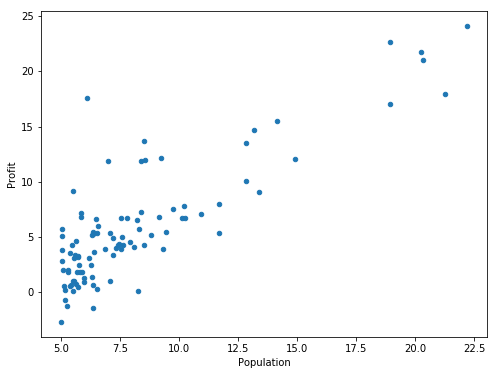

In [7]:
# Visualize the data
data.plot.scatter(x='Population', y='Profit', figsize=(8,6));

The complete data set can be described using the traditional statistical descriptors:

In [8]:
# Calculate some useful statistics showing how the data is distributed
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Exercise 1
Based on the descriptive statistics above, how would you summarize this data for the Board in a few sentences?

## Step 2: Define the Task You Want to Accomplish

The tasks that are possible to accomplish in a machine learning problem depend on how you slice up the dataset into features (inputs) and the target (output).

### Step 2a: Identify the Inputs
For this data, we have a single input or feature -- *town population*. We have 97 different town populations in our dataset. That's 97 different values for our single input variable. Keep in mind that each value is in 10,000s. So multipy the value you see by 10,000 to get the actual value of the population.

In [9]:
# Here are the input values
# Number of columns in our dataset
cols = data.shape[1]
# Inputs are in the first column - indexed as 0
X = data.iloc[:, 0:cols-1]
# Alternatively, X = data['Population']
print("Number of columns in the dataset {}".format(cols))
print("First few inputs\n {}".format(X.head()))

Number of columns in the dataset 2
First few inputs
    Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598


In [10]:
# The last few values of X
X.tail()

,Population
92,5.8707
93,5.3054
94,8.2934
95,13.3940
96,5.4369


### Step 2b: Identify the Output
The output is *annual restaurant profit*. For each value of the input we have a value for the output. Keep in mind that each value is in \$10,000s. So multipy the value you see by \$10,000 to get the actual annual profit for the restaurant.

Let's look at some of these output values.

In [11]:
# Here are the output vaues
# Outputs are in the second column - indexed as 1
y = data.iloc[:, cols-1:cols]
# Alternatively, y = data['Profits']
# See a sample of the outputs
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
# Last few items of the ouput
y.tail()

,Profit
92,7.20290
93,1.98690
94,0.14454
95,9.05510
96,0.61705


Once we've identified the inputs and the output, the task is easy to define: given the inputs, predict the output. So in this case, given a town's population, predict the profit a restarurant would generate. 

## Step 3: Define the Model

As we saw in the Nuts and Bolts session, a model is a way of transforming the inputs into the output.

For every row of the dataset, we use the same weights $w_{0}$ and $w_{1}$ to multiply each corresponding feature value in that row and summing like so:

$$(w_{0} * x_{0}) + (w_{1} * x_{1})$$

Depending on the values of the $w$ values and the features, this gives us a value for the output -- $\hat{y}$ -- in that row of the dataset.

### Step 3a: Define the Features

In this case the single feature is the population size (also our only input). Here the features and the inputs are one and the same. We'll find later that this doesn't always have to be so -- in some cases there can be fewer or greater features than the number of inputs.

### Step 3b: Transform the Features Into An Output

Once again, as we saw in the ML-Nuts-and-Bolts notebook, a model is a way of transforming the inputs into the output.

For every row of the dataset, we use the same weights $w_{0}$ and $w_{1}$ to multiply each corresponding feature value in that row and summing like so:

$$(w_{0} * x_{0}) + (w_{1} * x_{1})$$

Remember from the *Nuts and Bolts* notebook that $w_{0}$ is called the *intercept* and the value of $x_{0}$ is 1 for all rows.

Depending on the values of the $w$s and the features, this gives us a value for the output -- $\hat{y}$ -- in that row of the dataset.

### SIDE BAR - Matrix Notation

Because our datasets typically have lots of rows, applying a model to a dataset means hundreds, if not millions of equations like the one above -- in fact, one for each row of the dataset. The beautiful thing is matrix notation can express these millions of equations in a compact way using just a single line.

To see how matrix notation does this neat trick, first separate the dataset into the input features matrix $X$, the output values matrix $Y$.

Specifically, let 

$$X = 
\begin{bmatrix}
1 & 6.1101 \\
1 & 5.5277 \\
\vdots & \vdots \\
1 & 13.394 \\
1 & 5.4369
\end{bmatrix}$$

and 

$$Y = 
\begin{bmatrix}
17.5920 \\
9.1302 \\
\vdots \\
9.05510 \\
0.61705
\end{bmatrix}$$

In this simple dataset both $X$ and $Y$ are matrices with 97 rows; $X$ has 2 columns while $Y$ has only 1 column. In matrix notation, their dimensions are written as (97 x 2) and (97 x 1) respectively. The 'x' sign is not a multiplication as we usually take it but a way of saying we have a matrix dimension of (m rows x n columns).

**Three Rules of Matrices to Keep in Mind (the only ones we'll need)**
1. When you add, subtract, or multiply matrices each matrix MUST have the SAME dimensions. This is called "element-wise" addition, subtraction, or multiplication. Otherwise the operation of adding,  subtracting, or multiplying a matrix (element-wise) doesn't make sense.
2. When you "multiply" two matrices together (this is more correctly called the "dot product"), say $X$ and $W$, the column dimension of the first MUST be the row dimension of the second. Otherwise the operation of multiplying two matrices doesn't make sense.
3. The *transpose* of matrix M is written as $M^{T}$. If the dimensions of M are (m x n), then the dimensions of $M^{T}$ are (n x m). 

The equivalent of writing 

$$
(w_{0} * x_{0}^{(1)}) + (w_{1} * x_{1}^{(1)}) = y^{(1)} \\
(w_{0} * x_{0}^{(2)}) + (w_{1} * x_{1}^{(2)}) = y^{(2)} \\
(w_{0} * x_{0}^{(3)}) + (w_{1} * x_{1}^{(3)}) = y^{(3)} \\
(w_{0} * x_{0}^{(4)}) + (w_{1} * x_{1}^{(4)}) = y^{(4)} \\
\vdots \\
(w_{0} * x_{0}^{(96)}) + (w_{1} * x_{1}^{(96)}) = y^{(96)} \\
(w_{0} * x_{0}^{(97)}) + (w_{1} * x_{1}^{(97)}) = y^{(97)} \\
$$

is to write instead:

$$X \cdot W^{T} = Y$$ 

where X and Y are the matrices above, $\cdot$ is the symbol for "multipying" or taking the dot product of X and Y,  and W is a matrix that looks like

$$W = 
\begin{bmatrix}
w_{0} \\
w_{1} \\
\end{bmatrix}$$

It's as simple as that to represent in one line something that would other wise take hundreds of lines! And that's why matrix notation is handy.

### Step 3c: Clarify the Parameters

The parameters are $w_{0}$ and $w_{1}$.

## EXERCISE 2

Using the matrix rules above, what are the dimensions of the matrix $Y$?

## Step 4: Define the Penalty for Getting it Wrong
As we saw in the description of the model, $w_{0}$ and $w_{1}$ are the parameters of our model.

Let's pick a row from the dataset, assume values of -10 and 1 respectively for $w_{0}$ and $w_{1}$, and see what we get for the value of $\hat{y}$. We'll also subtract this from the actual ouput value of the row $y$ and define our penalty as a function of $\hat{y} - y$.

[We'll use the power of matrix multiplication to do these calculations without any fuss. If you're interested in the details, have a look at the *computePenalty* function in the *Shared-Functions* notebook.]

**Terminology**
The penalty always operates on a row of the dataset. When the penalties for every row of the dataset gets summed, that quantity is called the *cost*. So there's a *penalty* function that is applied to every row; sum the outputs of the penalty function over the rows of the dataset and you arrive at the *cost*. Sometimes people refer to the penalty function as the cost function. That's OK, there's not much harm done.

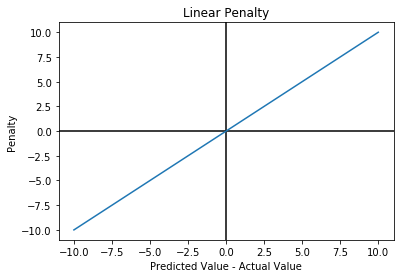

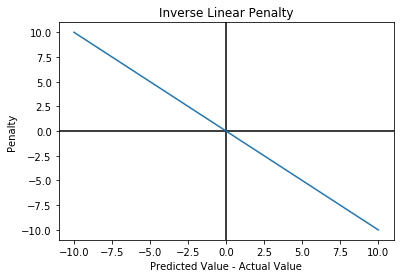

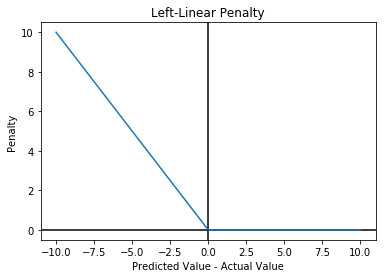

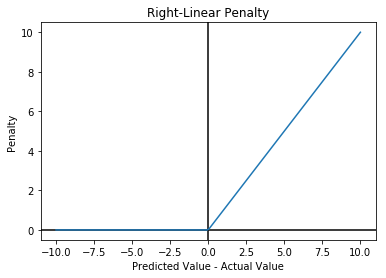

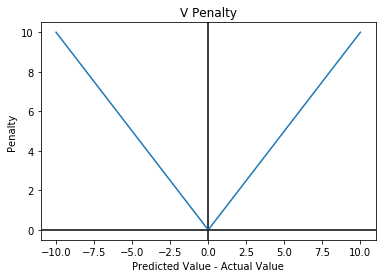

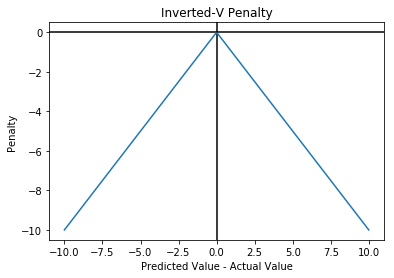

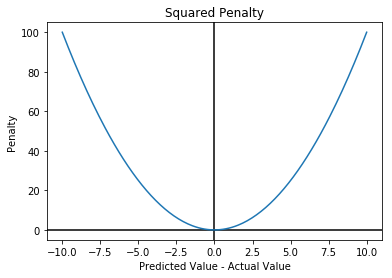

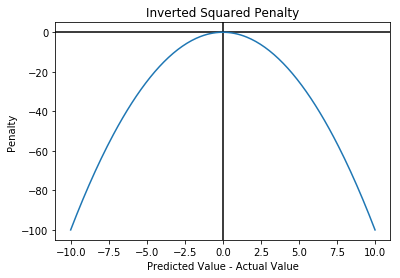

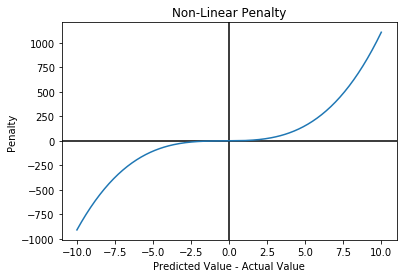

In [13]:
# A Handful of Penalty Functions
# Generate the error range
x = np.linspace(-10,10,100)
[penaltyPlot(x, pen) for pen in penaltyFunctions.keys()];

## Exercise 3

Does the penalty we've chosen make sense? Convince yourself of this and write a paragraph explaining why it makes sense.

In [14]:
penalty(X,y,[-10, 1], VPenalty)

3.8396675257731965

In [15]:
penalty(X,y,[-10, 1], invertedVPenalty)

-3.8396675257731965

### SIDEBAR -  How the Penalty is Usually Written

The cost of getting it wrong is defined as a function $J(W)$:

$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_{W}x^{(i)}) - y^{(i)})^2$$

What we're saying here: For each input, transform it using $w_{0}$ and $w_{1}$. This will give us a number. Subtract from this number the actual value of the output for that input. This gives us another number. Take this number and square it. This gives us our final result for that particular input. Add each of these final results -- one for each input we have in our dataset -- and divide it by $2m$ -- that is, twice the number of data points in our data set. This last division step is to make the cost of getting it wrong relative to the size of the dataset -- think of it simply as a mathematical convenience.

This way of writing things expresses exactly the same thing as writing out a series of equations would. That's why matrix notation is so powerful and widely used -- the matrix notation helps keep things short and sweet.

### How the Penalty Varies as the $w_{0}$ and $w_{1}$ Values Change

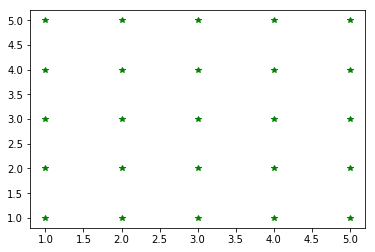

In [16]:
# Visualize what np.meshgrid does when used with plot
w0 = np.linspace(1,5,5)
w1 = np.linspace(1,5,5)
W0, W1 = np.meshgrid(w0,w1)
plt.plot(W0,W1, marker='*', color='g', linestyle='none');

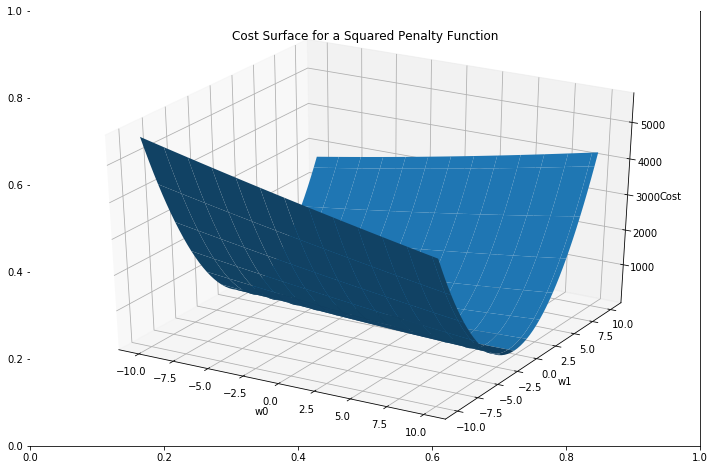

In [17]:
# Plot the cost surface
# From https://stackoverflow.com/questions/9170838
# See Also: Helpful matplotlib tutorial at 
#   http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html

# Set up a grid over w0,w1 values
w0 = np.linspace(-10,10,50)
w1 = np.linspace(-10,10,50)
W0, W1 = np.meshgrid(w0,w1)

# Get the penalty value for each point on the grid
# See the Shared-Functions.ipynb notebook for the list of defined penalty functions
# List of penalty functions in dict penaltyFunctions
penalties = np.array([penalty(X,y,[w_0,w_1], squaredPenalty) for w_0,w_1 in zip(np.ravel(W0), np.ravel(W1))])
Z = penalties.reshape(W0.shape)

# Create the plot
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_title("Cost Surface for a " + penaltyFunctions[squaredPenalty] + " Function")
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
p = ax.plot_surface(W0, W1, Z, rstride=4, cstride=4)

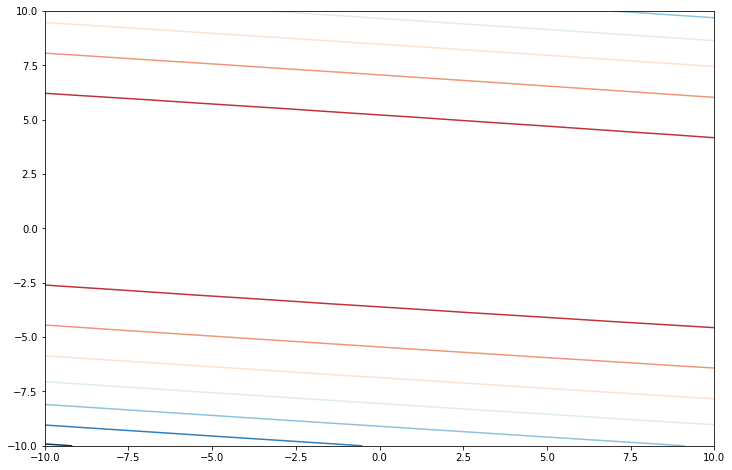

In [18]:
# Contour Lines
fig, ax = plt.subplots(figsize=(12,8))
plt.contour(Z, cmap=cm.RdBu,vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[-10,10,-10,10])

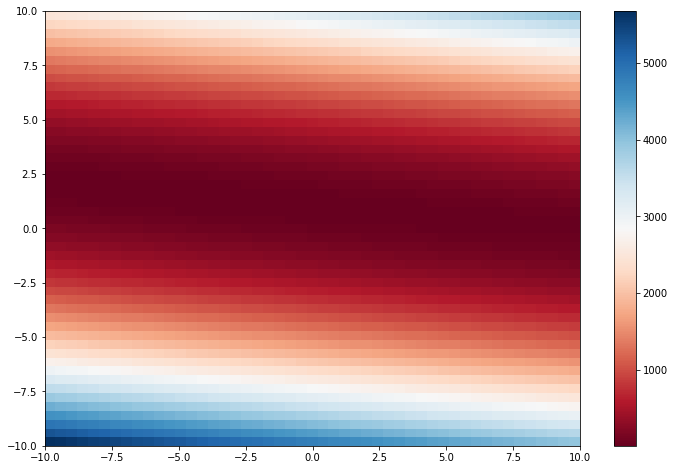

In [19]:
# Heatmap or Colormap
fig, ax = plt.subplots(figsize=(12,8))
p = ax.pcolor(W0, W1, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p)

## Step 5: Find the Parameter Values that Minimize the Cost

The cost function might have a minimum but how can we possibly find it? We can't use the brute force method of choosing every possible combination of values for $w_{0}$ and $w_{1}$ -- there are an infinite number of combinations and we'll never finish our task!

This is where the concept of *gradient descent* comes in. Imagine starting anywhere on the surface, say at $w_{0}$ at -10 and $w_{1}$ at -10. That's at the left front edge of the surface plot you've just seen. If we took a step in the direction where the slope under our feet is steepest, then we would be one step closer to the "bottom" of the surface. So let's take that step and then take the next step in the direction where the slope under our feet is steepest. That gets us even lower and in the right direction to the bottom. Eventually, after a number of these steps, you'll get to the bottom.

Let's look at this a bit more systematically.

That's the idea. To make it work, we have to write out an expression for the *next set of parameter values to try*. And it turns out that for the cost function $J(W)$, there is a well-worked out way to write these values for $w_{0}$ and $w_{1}$ based on the direction of the steepest slope.

**How To Choose the Next Set of Values for $W$**

$$w_{j} := w_{j} - \frac{\alpha}{m} \ [\sum_{i=1}^{m} (h_{W}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}]$$

### Implement the Iterative Method of Gradient Descent

Here's what we'll do.
- First pick initial values for $w_0$ and $w_1$. Pick anything within reason -- let's say 1 and -1 respectively.
- Choose a penalty function. We'll choose the squaredPenalty.
- For each row of the dataset find $\hat{y}$ for the values of $w_0$ and $w_1$. Find the value of the penalty for $y - \hat{y}$ using the penalty function.
- In this case, the penalty will be $(y - \hat{y})^2$
- Add up the penalty values for each row. This total is the cost.
- Use gradient descent to find the next set of $w_0$ and $w_1$ values that lower the cost. Repeat until the number of iterations specified are complete.
- The final values of $w_0$ and $w_1$ are the optimal values. Use these optimal parameter values to make predictions.

In [20]:
# Initialize the parameter values W and pick the penalty function
W_init = [1,-1.0]
penalty_function = squaredPenalty

In [21]:
# Test out the penalty function in the Shared-Functions notebook
penalty(X, y, W_init, penalty_function)

124.60461998249691

In [22]:
# Test out the gradientDescent function in the Shared-Functions notebook
gradientDescent(X, y, W_init, num_iterations=5)

(matrix([[ 1.00638604],
         [-0.93184795]]),
 13692389016.436712,
 [(matrix([[ 1.]]), matrix([[-1.]])),
  (matrix([[ 1.00129989]]), matrix([[-0.98614376]])),
  (matrix([[ 1.00258835]]), matrix([[-0.97240137]])),
  (matrix([[ 1.00386547]]), matrix([[-0.95877189]])),
  (matrix([[ 1.00513133]]), matrix([[-0.94525439]])),
  (matrix([[ 1.00638604]]), matrix([[-0.93184795]]))],
 array([  1.46969381e+10,   1.44393210e+10,   1.41860721e+10,
          1.39371186e+10,   1.36923890e+10]))

Run the iterative gradient descent method to determine the optimal parameter values.

In [23]:
# Set hyper-parameters
num_iters = 50 # number of iterations
learning_rate = 0.0005 # the learning rate

In [24]:
# Run gradient descent and capture the progression 
#  of cost values and the ultimate optimal W values
%time W_opt, final_penalty, running_w, running_penalty = gradientDescent(X, y, W_init, num_iters, learning_rate)
# Get the optimal W values and the last few cost values
W_opt, final_penalty, running_w[-5:], running_penalty[-5:]

CPU times: user 19.1 ms, sys: 5.17 ms, total: 24.3 ms
Wall time: 13 ms


(matrix([[ 1.1257191 ],
         [ 0.47990516]]),
 56303177.79407768,
 [(matrix([[ 1.1237428]]), matrix([[ 0.4419592]])),
  (matrix([[ 1.12429735]]), matrix([[ 0.45204799]])),
  (matrix([[ 1.12481046]]), matrix([[ 0.46172406]])),
  (matrix([[ 1.12528383]]), matrix([[ 0.47100436]])),
  (matrix([[ 1.1257191]]), matrix([[ 0.47990516]]))],
 array([  1.08898855e+08,   9.32319816e+07,   7.93517110e+07,
          6.70925391e+07,   5.63031778e+07]))

We can see that the Ws are changing even after 5000 interations...but at the 4th decimal place. Similarly, the penalty is changing (decreasing) in the 100s place.

## How cost changes as the number of iterations increase

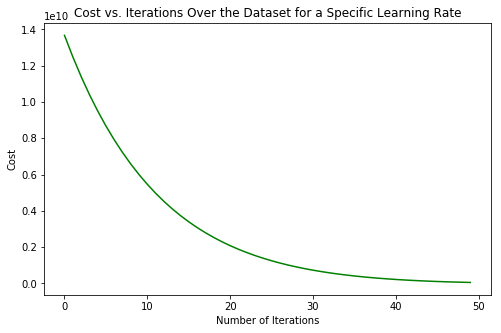

In [25]:
# How the penalty changes as the number of iterations increase
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(num_iters), running_penalty, 'g')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Iterations Over the Dataset for a Specific Learning Rate');

In [26]:
np.array(running_w).flatten()

array([ 1.        , -1.        ,  1.00649947, -0.93074002,  1.01271311,
       -0.86432441,  1.01865268, -0.80063628,  1.02432944, -0.73956354,
        1.02975418, -0.68099872,  1.03493728, -0.62483874,  1.03988866,
       -0.57098479,  1.04461784, -0.51934209,  1.04913397, -0.46981978,
        1.05344579, -0.42233072,  1.0575617 , -0.37679135,  1.06148975,
       -0.33312155,  1.06523768, -0.29124448,  1.06881288, -0.25108648,
        1.07222245, -0.2125769 ,  1.07547319, -0.175648  ,  1.07857165,
       -0.14023482,  1.08152408, -0.10627507,  1.08433647, -0.07370903,
        1.0870146 , -0.04247941,  1.08956397, -0.0125313 ,  1.09198988,
        0.01618796,  1.09429741,  0.04372888,  1.09649142,  0.07013988,
        1.09857658,  0.09546739,  1.10055736,  0.11975594,  1.10243806,
        0.14304822,  1.10422278,  0.16538519,  1.10591548,  0.18680608,
        1.10751994,  0.20734856,  1.10903979,  0.22704872,  1.1104785 ,
        0.24594117,  1.11183941,  0.26405911,  1.11312573,  0.28

In [27]:
w0 = np.array([param[0].flatten() for param in running_w][1:]).flatten()
w1 = np.array([param[1] for param in running_w][1:]).flatten()
len(w0), len(w1), len(np.arange(num_iters))

(50, 50, 50)

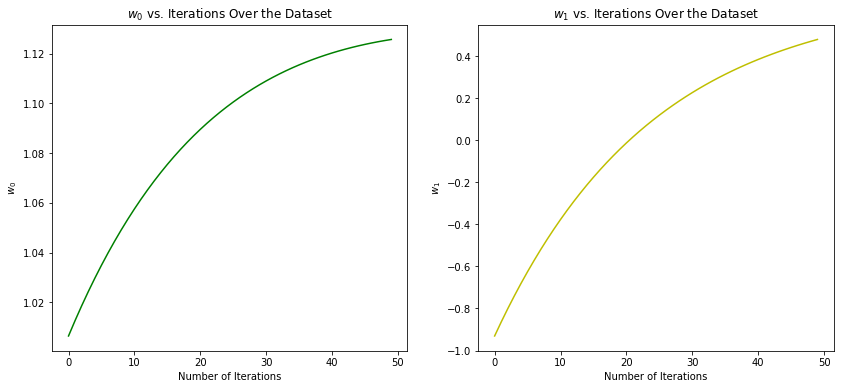

In [28]:
# How the Ws change as the number of iterations increase
fig, (ax1,ax2) = plt.subplots(figsize=(14,6), nrows=1, ncols=2, sharey=False)
ax1.plot(np.arange(num_iters), w0, 'g')
ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel(r'$w_{0}$')
ax1.set_title(r'$w_{0}$ vs. Iterations Over the Dataset')
ax2.plot(np.arange(num_iters), w1, 'y')
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel(r'$w_{1}$')
ax2.set_title(r'$w_{1}$ vs. Iterations Over the Dataset')

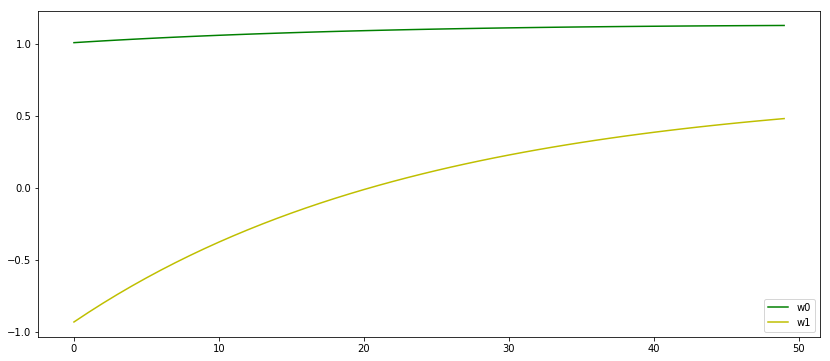

In [29]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(np.arange(num_iters), w0, 'g', label="w0")
ax.plot(np.arange(num_iters), w1, 'y', label="w1")
plt.legend()

## Exercise 4
Experiment with different values of alpha, W, and iters. Write down your observations.

## Step 6: Use the Model and Optimal Parameter Values to Make Predictions
Let's see how our optimal parameter values can be used to make predictions.

In [30]:
W_opt[0,0], W_opt[1,0]

(1.1257191049539841, 0.47990515675221757)

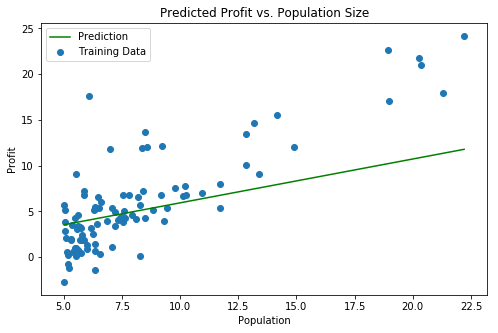

In [31]:
# Create 100 equally spaced values going from the minimum value of population 
# to the maximum value of the population in the dataset.
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = (W_opt[0, 0] * 1) + (W_opt[1, 0] * x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'g', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc='upper left')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size');

In [32]:
# First 5 population values in the dataset
X[0:5].values.flatten()

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598])

In [33]:
# Prediction of profit for the first 5 populations in the dataset
#populations = [5, 6, 12, 14, 15]
populations = X[0:5].values.flatten()
profits = [W_opt[0, 0] + (W_opt[1, 0] * pop * 10000) for pop in populations]
#print(profits)
print(['${:5,.0f}'.format(profit) for profit in profits])

['$29,324', '$26,529', '$40,882', '$33,610', '$28,123']


## Experimenting with Hyperparameters
### Balancing Learning Rate with Number of Iterations

### Learning Rate - The Intuition

<img src="../Images/gradient-descent-intuition.png" alt="Under- and Overshoot in Learning Size" style="width: 600px;"/>

In [34]:
# How predictions change as the learning rate and the 
#  number of iterations are changed
learning_rates = [0.001, 0.009]
epochs = [10, 500] # epoch is another way of saying num_iters

In [35]:
# All combinations of learning rates and epochs
from itertools import permutations
combos = [list(zip(epochs, p)) for p in permutations(learning_rates)]
combos

[[(10, 0.001), (500, 0.009)], [(10, 0.009), (500, 0.001)]]

In [36]:
# get it into the right format to plug into the gradient descent function
combos_list = []
for i in range(len(combos)):
    for j in range(len(combos[i])):
        combos_list.append([combos[i][j][0], combos[i][j][1]])

combos_list

[[10, 0.001], [500, 0.009], [10, 0.009], [500, 0.001]]

In [37]:
gdResults = [gradientDescent(X, y, \
                             W_init, combos_list[i][0], combos_list[i][1]) for i in range(len(combos_list))]

In [38]:
W_values = [gdResults[i][0] for i in range(len(gdResults))]
len(gdResults), len(W_values)

(4, 4)

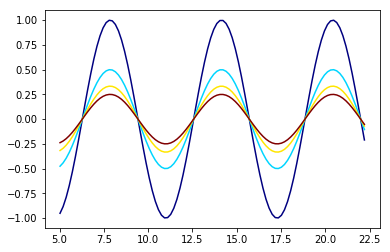

In [39]:
# Test it out
# From https://stackoverflow.com/questions/31883097/
cmap = plt.get_cmap('jet')
plot_colors = cmap(np.linspace(0, 1, len(combos_list)))
for i, (combo, color) in enumerate(zip(combos_list, plot_colors), 1):
    plt.plot(x, np.sin(x)/i, label=combo, c=color)

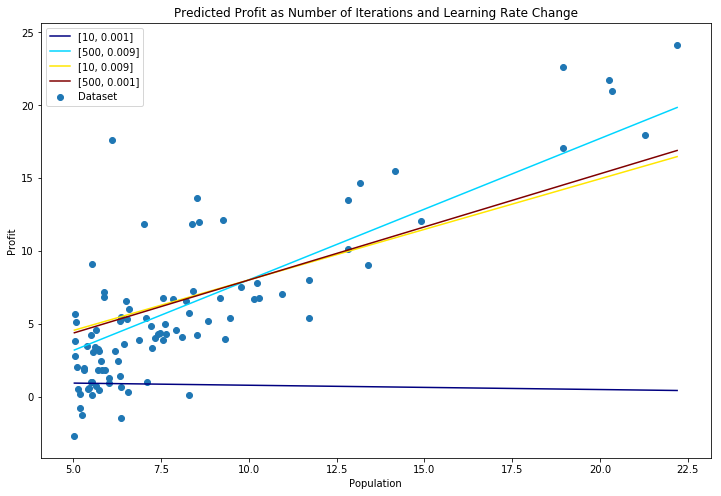

In [40]:
# Create 100 equally spaced values going from the minimum value of population 
# to the maximum value of the population in the dataset.
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f_list = [(W_values[i][0] * 1) + (W_values[i][1] * x).T for i in range(len(W_values))]
fig, ax = plt.subplots(figsize=(12,8))
#[ax.plot(x, f_list[i], 'r', label=combos_list[i]) for i in range(len(f_list))]
for i, (combo, color) in enumerate(zip(combos_list, plot_colors), 1):
    ax.plot(x, f_list[i-1], label=combo, c=color)
ax.scatter(data.Population, data.Profit, label='Dataset')
ax.legend(loc='upper left')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit as Number of Iterations and Learning Rate Change');

## Exercise 5

In the plot above what do you observe about the way in which the learning rate and the number of interactions determine the "prediction line" that is learned? 

## Exercise 6

Now you can make predictions of profit based on your data. What are the predicted profits for populations of 50,000, 100,000, 160,000, and 180,000? Are the predictions reasonable? Explain why or why not?

In [41]:
# We're using the optimal W values obtained when the learning rate = 0.001 
# and the number of iterations = 500
predictions = [(W_values[3][0] * 1) + (W_values[3][1] * pop) for pop in [50000, 100000, 160000, 180000]]

# Get into the right form form printing
preds = np.array(predictions).squeeze()
print(['${:5,.0f}'.format(pred) for pred in preds])

['$36,409', '$72,817', '$116,507', '$131,070']


## Learning from Experience

## Exercise 7

What happens to the optimal values of W if we use just a quarter of the dataset? What happens if we now use half of the training set? How does this relate to Tom Mitchell's definition of machine learning?

In [42]:
# We'll use the values of num_iters and learning_rate defined above
print("num_iters: {}".format(num_iters))
print("learning rate: {}".format(learning_rate))

num_iters: 50
learning rate: 0.0005


In [43]:
# Vary the size of the dataset
dataset_sizes = [2, 5, 10, 25, 50, len(X)]
gdResults = [gradientDescent(X[0:dataset_sizes[i]], y[0:dataset_sizes[i]], \
                             W_init, num_iters, learning_rate) for i in range(len(dataset_sizes))]

In [44]:
# This allows us to color our plot lines differently without explicitly specifying colors
cmap2 = plt.get_cmap('jet')
plot_colors2 = cmap2(np.linspace(0, 1, len(dataset_sizes)))

In [45]:
W_values = [gdResults[i][0] for i in range(len(gdResults))]
W_values[0]

matrix([[ 1.30335869],
        [ 0.79511188]])

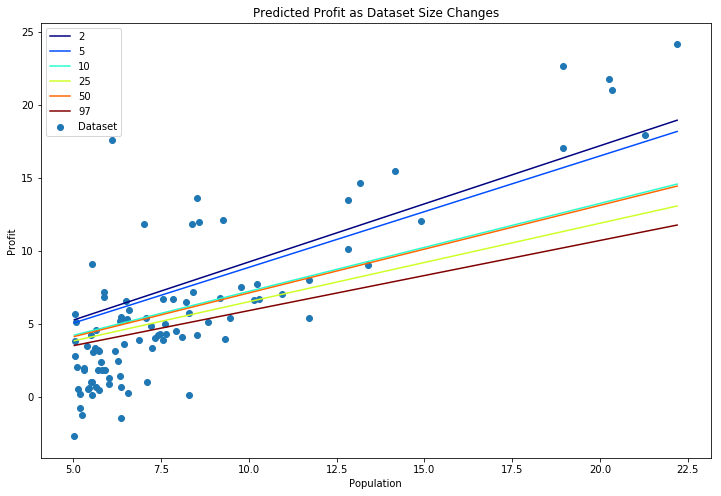

In [46]:
# Create 100 equally spaced values going from the minimum value of population 
# to the maximum value of the population in the dataset.
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f_list = [(W_values[i][0] * 1) + (W_values[i][1] * x).T for i in range(len(W_values))]
fig, ax = plt.subplots(figsize=(12,8))
#[ax.plot(x, f_list[i], 'y', label=dataset_sizes[i]) for i in range(len(f_list))]
for i, (dataset, color) in enumerate(zip(dataset_sizes, plot_colors2), 1):
    ax.plot(x, f_list[i-1], label=dataset, c=color)
ax.scatter(data.Population, data.Profit, label='Dataset')
ax.legend(loc='upper left')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit as Dataset Size Changes')

## Step 7: Measure the Performance of the Model

We're going to delay this step until later on in the course.

## Summary
We took the steps we learned in the ML-Nuts-and-Bolts notebook and applied them to one of the simplest problems in data science. The problem may have been simple but the concepts or the way of looking at the problem is what's important. We looked at the problem through the eyes of a machine -- one that learns a set of optimal parameters from a dataset. The optimal values depend on the penalty function, the learning rate, and the number of iterations. And of course the optimal values definitely depend on the dataset -- that's what it is to learn from experience! 

In the next notebook we'll extend our techniques to regression with multiple input variables.